In [1]:
import os
!pip install pandas
import pandas as pd
!pip install seaborn
import seaborn as sns
!pip installmatplotlib
import matplotlib.pyplot as plt
import requests
!pip install mygene
import mygene
import json
!pip install numpy
import numpy as np

ERROR: unknown command "installmatplotlib"


In [2]:
df_disease_target_evidence = pd.read_csv("suppl_table_disease_target_evidence_01032024.csv")

In [4]:
df_disease_target_evidence

,Unnamed: 0,gene_id,disease_ontology_id,disease,disease_relevant_tissue,gene_name,gene_class,genetic_association,known_drug,is_druggable,is_safe,is_effective,is_approved,GWAS_evidence,ct_marker_evidence,disease_evidence,ct_marker_and_disease_evidence,disease_evidence_tissue,disease_evidence_celltype
0,ENSG00000000938_MONDO_0005097,ENSG00000000938,MONDO_0005097,squamous cell lung carcinoma,lung,FGR,kinases,0.000000,0.060793,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
1,ENSG00000002016_MONDO_0005097,ENSG00000002016,MONDO_0005097,squamous cell lung carcinoma,lung,RAD52,other,0.235956,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.0,0.0
2,ENSG00000010810_MONDO_0005097,ENSG00000010810,MONDO_0005097,squamous cell lung carcinoma,lung,FYN,kinases,0.000000,0.060793,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0.0,0.0
3,ENSG00000014138_MONDO_0005097,ENSG00000014138,MONDO_0005097,squamous cell lung carcinoma,lung,POLA2,other,0.000000,0.479489,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0
4,ENSG00000019991_MONDO_0005097,ENSG00000019991,MONDO_0005097,squamous cell lung carcinoma,lung,HGF,other,0.000000,0.151983,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415564,ENSG00000288558_MONDO_0015517,ENSG00000288558,MONDO_0015517,common variable immunodeficiency,blood,DUS4L-BCAP29,other,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
415565,ENSG00000288649_MONDO_0015517,ENSG00000288649,MONDO_0015517,common variable immunodeficiency,blood,ACTL10,other,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
415566,ENSG00000288675_MONDO_0015517,ENSG00000288675,MONDO_0015517,common variable immunodeficiency,blood,PANO1,other,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
415567,ENSG00000288701_MONDO_0015517,ENSG00000288701,MONDO_0015517,common variable immunodeficiency,blood,PRRC2B,other,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0


In [5]:
diseases_list = list(np.unique(df_disease_target_evidence['disease']))


In [6]:
len(np.unique(df_disease_target_evidence['disease_ontology_id']))

30

In [7]:
np.unique(df_disease_target_evidence['disease'])

array(['B-cell non-Hodgkin lymphoma', 'Barrett esophagus', 'COVID-19',
       'Crohn disease', 'Crohn ileitis', 'acute kidney failure',
       'adenocarcinoma', 'benign prostatic hyperplasia', 'breast cancer',
       'cardiomyopathy', 'chronic kidney disease',
       'chronic obstructive pulmonary disease', 'chronic rhinitis',
       'common variable immunodeficiency', 'cystic fibrosis',
       'follicular lymphoma', 'gastritis', 'influenza',
       'interstitial lung disease', 'lung adenocarcinoma',
       'myocardial infarction', 'non-small cell lung carcinoma',
       'pneumonia', 'pulmonary emphysema', 'pulmonary fibrosis',
       'small cell lung carcinoma', 'squamous cell lung carcinoma',
       'stomach disorder', 'systemic lupus erythematosus',
       'type 1 diabetes mellitus'], dtype=object)

In [8]:
#disease ids for cell x gene analysis matched with Open Targets Ids
df_diseases_ed = pd.read_csv("DiseasesInformation_OpenTargets_06142023_ed_92023.csv")
df_diseases_ed.head()

,Unnamed: 0,id,name,therapeuticAreas,therapeuticAreas_text,cxg_matched_id
0,0,EFO_0000182,hepatocellular carcinoma,"['MONDO_0045024', 'EFO_0001379', 'EFO_0010282']","['cancer or benign tumor', 'endocrine system d...",MONDO_0007256
1,1,EFO_0002616,macroglobulinemia,"['OTAR_0000018', 'OTAR_0000020']","['genetic, familial or congenital disease', 'n...",MONDO_0005190
2,2,EFO_0004703,age at menarche,['EFO_0001444'],['measurement'],EFO_0004703
3,3,EFO_0004806,asbestos exposure measurement,['EFO_0001444'],['measurement'],EFO_0004806
4,4,EFO_0004867,vitamin E measurement,['EFO_0001444'],['measurement'],EFO_0004867


In [9]:
diseases_list = list(np.unique(df_disease_target_evidence['disease']))

for i in diseases_list:
        print(i)
        print(df_diseases_ed[df_diseases_ed['name']==i][['id','name','cxg_matched_id']])
        #print(df_disease_target_evidence[df_disease_target_evidence['disease']==i]['Unnamed: 0'])

B-cell non-Hodgkin lymphoma
Empty DataFrame
Columns: [id, name, cxg_matched_id]
Index: []
Barrett esophagus
Empty DataFrame
Columns: [id, name, cxg_matched_id]
Index: []
COVID-19
                  id      name cxg_matched_id
14132  MONDO_0100096  COVID-19  MONDO_0100096
Crohn disease
Empty DataFrame
Columns: [id, name, cxg_matched_id]
Index: []
Crohn ileitis
                 id           name cxg_matched_id
7398  MONDO_0000709  Crohn ileitis  MONDO_0000709
acute kidney failure
                  id                  name cxg_matched_id
21435  MONDO_0002492  acute kidney failure  MONDO_0002492
adenocarcinoma
               id            name cxg_matched_id
7689  EFO_0000228  adenocarcinoma  MONDO_0004970
benign prostatic hyperplasia
               id                          name cxg_matched_id
6099  EFO_0000284  benign prostatic hyperplasia  MONDO_0010811
breast cancer
                 id           name cxg_matched_id
1351  MONDO_0007254  breast cancer  MONDO_0007254
cardiomyopathy
     

In [10]:
df_diseases_ed = df_diseases_ed.rename(columns={'cxg_matched_id': 'disease_ontology_id'})
df_diseases_ed.head()

,Unnamed: 0,id,name,therapeuticAreas,therapeuticAreas_text,disease_ontology_id
0,0,EFO_0000182,hepatocellular carcinoma,"['MONDO_0045024', 'EFO_0001379', 'EFO_0010282']","['cancer or benign tumor', 'endocrine system d...",MONDO_0007256
1,1,EFO_0002616,macroglobulinemia,"['OTAR_0000018', 'OTAR_0000020']","['genetic, familial or congenital disease', 'n...",MONDO_0005190
2,2,EFO_0004703,age at menarche,['EFO_0001444'],['measurement'],EFO_0004703
3,3,EFO_0004806,asbestos exposure measurement,['EFO_0001444'],['measurement'],EFO_0004806
4,4,EFO_0004867,vitamin E measurement,['EFO_0001444'],['measurement'],EFO_0004867


In [11]:
ids_df = df_diseases_ed[["id", "disease_ontology_id"]].copy()
ids_df.head()

,id,disease_ontology_id
0,EFO_0000182,MONDO_0007256
1,EFO_0002616,MONDO_0005190
2,EFO_0004703,EFO_0004703
3,EFO_0004806,EFO_0004806
4,EFO_0004867,EFO_0004867


In [12]:
df_diseases_ed_withOT = pd.merge(df_disease_target_evidence, ids_df, on = 'disease_ontology_id', how = "left")
df_diseases_ed_withOT['target-disease'] = df_diseases_ed_withOT.gene_id.str.cat(df_diseases_ed_withOT.id, sep='_')
df_diseases_ed_withOT

,Unnamed: 0,gene_id,disease_ontology_id,disease,disease_relevant_tissue,gene_name,gene_class,genetic_association,known_drug,is_druggable,...,is_effective,is_approved,GWAS_evidence,ct_marker_evidence,disease_evidence,ct_marker_and_disease_evidence,disease_evidence_tissue,disease_evidence_celltype,id,target-disease
0,ENSG00000000938_MONDO_0005097,ENSG00000000938,MONDO_0005097,squamous cell lung carcinoma,lung,FGR,kinases,0.000000,0.060793,1.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,EFO_0000708,ENSG00000000938_EFO_0000708
1,ENSG00000002016_MONDO_0005097,ENSG00000002016,MONDO_0005097,squamous cell lung carcinoma,lung,RAD52,other,0.235956,0.000000,0.0,...,0.0,0.0,1.0,0.0,0.0,0,0.0,0.0,EFO_0000708,ENSG00000002016_EFO_0000708
2,ENSG00000010810_MONDO_0005097,ENSG00000010810,MONDO_0005097,squamous cell lung carcinoma,lung,FYN,kinases,0.000000,0.060793,1.0,...,0.0,0.0,0.0,1.0,0.0,0,0.0,0.0,EFO_0000708,ENSG00000010810_EFO_0000708
3,ENSG00000014138_MONDO_0005097,ENSG00000014138,MONDO_0005097,squamous cell lung carcinoma,lung,POLA2,other,0.000000,0.479489,1.0,...,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,EFO_0000708,ENSG00000014138_EFO_0000708
4,ENSG00000019991_MONDO_0005097,ENSG00000019991,MONDO_0005097,squamous cell lung carcinoma,lung,HGF,other,0.000000,0.151983,1.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,EFO_0000708,ENSG00000019991_EFO_0000708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415564,ENSG00000288558_MONDO_0015517,ENSG00000288558,MONDO_0015517,common variable immunodeficiency,blood,DUS4L-BCAP29,other,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,MONDO_0015517,ENSG00000288558_MONDO_0015517
415565,ENSG00000288649_MONDO_0015517,ENSG00000288649,MONDO_0015517,common variable immunodeficiency,blood,ACTL10,other,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,MONDO_0015517,ENSG00000288649_MONDO_0015517
415566,ENSG00000288675_MONDO_0015517,ENSG00000288675,MONDO_0015517,common variable immunodeficiency,blood,PANO1,other,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,MONDO_0015517,ENSG00000288675_MONDO_0015517
415567,ENSG00000288701_MONDO_0015517,ENSG00000288701,MONDO_0015517,common variable immunodeficiency,blood,PRRC2B,other,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,MONDO_0015517,ENSG00000288701_MONDO_0015517


In [13]:
len(np.unique(df_diseases_ed_withOT['disease_ontology_id']))

30

In [14]:
len(np.unique(df_diseases_ed_withOT['id']))

30

In [15]:
df_diseases_ed_withOT[df_diseases_ed_withOT['disease']=='pulmonary fibrosis'] # aggregate evidence table has cell x gene id

,Unnamed: 0,gene_id,disease_ontology_id,disease,disease_relevant_tissue,gene_name,gene_class,genetic_association,known_drug,is_druggable,...,is_effective,is_approved,GWAS_evidence,ct_marker_evidence,disease_evidence,ct_marker_and_disease_evidence,disease_evidence_tissue,disease_evidence_celltype,id,target-disease
100391,ENSG00000027697_MONDO_0002771,ENSG00000027697,MONDO_0002771,pulmonary fibrosis,lung,IFNGR1,catalytic_receptors,0.000000,0.455948,1.0,...,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,EFO_0009448,ENSG00000027697_EFO_0009448
100392,ENSG00000037280_MONDO_0002771,ENSG00000037280,MONDO_0002771,pulmonary fibrosis,lung,FLT4,catalytic_receptors,0.000000,0.798921,1.0,...,1.0,1.0,0.0,1.0,0.0,0,0.0,0.0,EFO_0009448,ENSG00000037280_EFO_0009448
100393,ENSG00000040275_MONDO_0002771,ENSG00000040275,MONDO_0002771,pulmonary fibrosis,lung,SPDL1,other,0.551639,0.000000,0.0,...,0.0,0.0,1.0,0.0,0.0,0,0.0,0.0,EFO_0009448,ENSG00000040275_EFO_0009448
100394,ENSG00000066468_MONDO_0002771,ENSG00000066468,MONDO_0002771,pulmonary fibrosis,lung,FGFR2,catalytic_receptors,0.000000,0.798921,1.0,...,1.0,1.0,0.0,0.0,0.0,0,0.0,0.0,EFO_0009448,ENSG00000066468_EFO_0009448
100395,ENSG00000068078_MONDO_0002771,ENSG00000068078,MONDO_0002771,pulmonary fibrosis,lung,FGFR3,catalytic_receptors,0.000000,0.798921,1.0,...,1.0,1.0,0.0,0.0,0.0,0,0.0,0.0,EFO_0009448,ENSG00000068078_EFO_0009448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114511,ENSG00000286219_MONDO_0002771,ENSG00000286219,MONDO_0002771,pulmonary fibrosis,lung,NOTCH2NLC,other,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,EFO_0009448,ENSG00000286219_EFO_0009448
114512,ENSG00000286522_MONDO_0002771,ENSG00000286522,MONDO_0002771,pulmonary fibrosis,lung,H3C2,other,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,EFO_0009448,ENSG00000286522_EFO_0009448
114513,ENSG00000288649_MONDO_0002771,ENSG00000288649,MONDO_0002771,pulmonary fibrosis,lung,ACTL10,other,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,EFO_0009448,ENSG00000288649_EFO_0009448
114514,ENSG00000288701_MONDO_0002771,ENSG00000288701,MONDO_0002771,pulmonary fibrosis,lung,PRRC2B,other,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,EFO_0009448,ENSG00000288701_EFO_0009448


In [16]:
## disease table is called df_molecule
myPath = 'OT_json/molecule'

col_names = ['id', 
             'name', 
             'description', 
             'hasBeenWithdrawn', 
             'blackBoxWarning', 
             'drugType', 
             'maximumClinicalTrialPhase',
             'yearOfFirstApproval',
             'linkedTargets',
             'linkedDiseases'
            ]

allFiles = os.listdir(myPath)
first = True
for module in allFiles:
    # get one file in directory
    if 'part-' in module: #if the word module is in the filename
        a = os.path.join(myPath, module)  
        
        targetsList = []
        #print("Started Reading JSON file which contains multiple JSON document")
        with open(a) as f:
            for jsonObj in f:
                targetsListDict = json.loads(jsonObj)
                targetsList.append(targetsListDict)
        
        i = 0
        nrow = len(targetsList)
        file_data = []
        while i < nrow:
            new_row = [targetsList[i]['id'],
                       targetsList[i]['name']
                      ]
            
            if not (targetsList[i].get('description') is None):
                #print('has drug type: ')
                #print(targetsList[i].get('drugType'))
                new_row = new_row+[targetsList[i].get('description')]
            else:
                #print("no drug type")
                new_row = new_row+['no description']
            
            if not (targetsList[i].get('hasBeenWithdrawn') is None):
                #print('has drug type: ')
                #print(targetsList[i].get('drugType'))
                new_row = new_row+[targetsList[i].get('hasBeenWithdran')]
            else:
                #print("no drug type")
                new_row = new_row+['no information']
                
            if not (targetsList[i].get('blackBoxWarning') is None):
                #print('has drug type: ')
                #print(targetsList[i].get('drugType'))
                new_row = new_row+[targetsList[i].get('blackBoxWarning')]
            else:
                #print("no drug type")
                new_row = new_row+['no information']
            
            if not (targetsList[i].get('drugType') is None):
                #print('has drug type: ')
                #print(targetsList[i].get('drugType'))
                new_row = new_row+[targetsList[i].get('linkeddrugType')]
            else:
                #print("no drug type")
                new_row = new_row+['no type']
            
            
            if not (targetsList[i].get('maximumClinicalTrialPhase') is None):
                #print('has max phase: ')
                #print(targetsList[i].get('maximumClinicalTrialPhase'))
                new_row = new_row+[targetsList[i].get('maximumClinicalTrialPhase')]
            else:
                #print("no max phase")
                new_row = new_row+['no max phase']
            
            
            if not (targetsList[i].get('yearOfFirstApproval') is None):
                #print('has year of first approval: ')
                #print(targetsList[i].get('yearOfFirstApproval'))    
                new_row = new_row+[targetsList[i].get('yearOfFirstApproval')]
                
            else:
                #print("no approval year")
                new_row = new_row+['no approval year']
            
            
            if not (targetsList[i].get('linkedTargets') is None):
                #print('has targets: ')
                #print(targetsList[i].get('linkedTargets')['rows'])
                
                new_row = new_row+[targetsList[i].get('linkedTargets')['rows']]
                
            else:
                #print("no targets")
                new_row = new_row+[[]]
                
                
            if not (targetsList[i].get('linkedDiseases') is None):
                #print('has diseases: ')
                #print(targetsList[i].get('linkedDiseases')['rows'])
                
                new_row = new_row+[targetsList[i].get('linkedDiseases')['rows']]
                
            else:
                #print("no diseases")  
                new_row = new_row+[[]]
                

            file_data.append(new_row)
            
            i = i+1
            #print(new_row)
        
        if first:
            all_data = file_data
            first = False
            
        
        else:
            all_data = all_data+file_data
            
df_molecule = pd.DataFrame(all_data, columns = col_names) 
df_molecule

,id,name,description,hasBeenWithdrawn,blackBoxWarning,drugType,maximumClinicalTrialPhase,yearOfFirstApproval,linkedTargets,linkedDiseases
0,CHEMBL1066,"(R,R)-TRAMADOL",Small molecule drug.,None,False,None,no max phase,no approval year,[],[]
1,CHEMBL1098248,CHEMBL1098248,Small molecule drug.,None,False,None,no max phase,no approval year,[],[]
2,CHEMBL116018,CHEMBL116018,Small molecule drug.,None,False,None,no max phase,no approval year,[],[]
3,CHEMBL1172,DESLORATADINE,Small molecule drug with a maximum clinical tr...,None,False,None,4.0,2001,[ENSG00000196639],"[EFO_0007214, EFO_0005531, EFO_0005854, MONDO_..."
4,CHEMBL1200490,CETRORELIX,Protein drug with a maximum clinical trial pha...,None,False,None,4.0,2000,[ENSG00000109163],"[EFO_0000545, MONDO_0011972, EFO_0000685, EFO_..."
...,...,...,...,...,...,...,...,...,...,...
17090,CHEMBL56053,CHEMBL56053,Small molecule drug.,None,False,None,no max phase,no approval year,[],[]
17091,CHEMBL56190,CHEMBL56190,Small molecule drug.,None,False,None,no max phase,no approval year,[],[]
17092,CHEMBL648,CYCLIZINE,Small molecule drug with a maximum clinical tr...,None,False,None,4.0,1982,[ENSG00000196639],[MONDO_0005271]
17093,CHEMBL74926,PHENSERINE,Small molecule drug.,None,False,None,no max phase,no approval year,[],[]


In [17]:
df_molecule.shape

(17095, 10)

In [18]:
A= df_molecule['linkedDiseases'].copy()[17094]

In [19]:
from itertools import product

list_1 = ["EFO_01", "EFO_02", "EFO_03"]
list_2 = ["ENSA", "ENSB"]

result = pd.DataFrame(list(product(list_2, list_1)), columns = ['target', 'disease'])
result['target-disease'] = result.target.str.cat(result.disease, sep='_')
result

def create_target_disease_pairs(list_diseases, list_targets):
    result = pd.DataFrame(list(product(list_targets, list_diseases)), columns = ['target', 'disease'])
    result['target-disease'] = result.target.str.cat(result.disease, sep='_')
    return result

create_target_disease_pairs(list_1, list_2)
    

,target,disease,target-disease
0,ENSA,EFO_01,ENSA_EFO_01
1,ENSA,EFO_02,ENSA_EFO_02
2,ENSA,EFO_03,ENSA_EFO_03
3,ENSB,EFO_01,ENSB_EFO_01
4,ENSB,EFO_02,ENSB_EFO_02
5,ENSB,EFO_03,ENSB_EFO_03


In [20]:
def look_up(target_disease_pair, df_disease_target_evidence_df):
    row_data = df_disease_target_evidence_df.loc[df_disease_target_evidence_df['target-disease']==target_disease_pair]
    
    genetic_association = row_data['genetic_association'].iloc[0]
    GWAS = row_data['GWAS_evidence'].iloc[0]
    
    gen_ev_list = [genetic_association, GWAS]
    
    ct_marker_evidence = row_data['ct_marker_evidence'].iloc[0]
    disease_evidence = row_data['disease_evidence'].iloc[0]
    #disease_evidence_tissue = row_data['disease_evidence_tissue'].iloc[0]
    #disease_evidence_celltype = row_data['disease_evidence_celltype'].iloc[0]
    
    cell_ev_list = [ct_marker_evidence, 
                    disease_evidence 
                    #disease_evidence_tissue, 
                    #disease_evidence_celltype
                   ]
    
    genetic_evidence_exists = any(gen_ev_list)
    cell_evidence_exists = any(cell_ev_list)
    
    return genetic_evidence_exists, cell_evidence_exists

def look_up_ct(target_disease_pair, df_disease_target_evidence_df):
    row_data = df_disease_target_evidence_df.loc[df_disease_target_evidence_df['target-disease']==target_disease_pair]
    
    genetic_association = row_data['genetic_association'].iloc[0]
    GWAS = row_data['GWAS_evidence'].iloc[0]
    
    gen_ev_list = [genetic_association, GWAS]
    
    ct_marker_evidence = row_data['ct_marker_evidence'].iloc[0]
    disease_evidence = row_data['disease_evidence'].iloc[0]
    #disease_evidence_tissue = row_data['disease_evidence_tissue'].iloc[0]
    #disease_evidence_celltype = row_data['disease_evidence_celltype'].iloc[0]
    
    cell_ev_list = [ct_marker_evidence 
                    #disease_evidence 
                    #disease_evidence_tissue, 
                    #disease_evidence_celltype
                   ]
    
    genetic_evidence_exists = any(gen_ev_list)
    cell_evidence_exists = any(cell_ev_list)
    
    return genetic_evidence_exists, cell_evidence_exists

def look_up_disease(target_disease_pair, df_disease_target_evidence_df):
    row_data = df_disease_target_evidence_df.loc[df_disease_target_evidence_df['target-disease']==target_disease_pair]
    
    genetic_association = row_data['genetic_association'].iloc[0]
    GWAS = row_data['GWAS_evidence'].iloc[0]
    
    gen_ev_list = [genetic_association, GWAS]
    
    ct_marker_evidence = row_data['ct_marker_evidence'].iloc[0]
    disease_evidence = row_data['disease_evidence'].iloc[0]
    #disease_evidence_tissue = row_data['disease_evidence_tissue'].iloc[0]
    #disease_evidence_celltype = row_data['disease_evidence_celltype'].iloc[0]
    
    cell_ev_list = [disease_evidence 
                    #disease_evidence_tissue, 
                    #disease_evidence_celltype
                   ]
    
    genetic_evidence_exists = any(gen_ev_list)
    cell_evidence_exists = any(cell_ev_list)
    
    return genetic_evidence_exists, cell_evidence_exists


look_up("ENSG00000288701_MONDO_0015517", df_diseases_ed_withOT)  

(False, False)

In [21]:
#test_data = pd.DataFrame([['a_b', 1,0,0,0,0,0],['c_d',0,0,0,1,0,0 ], ['e_w',1,0,0,1,0,0]], columns = ['target-disease', 
#                                                                                 'genetic_association',
#                                                                                 'GWAS_evidence',
#                                                                                 'ct_marker_evidence',
#                                                                                 'disease_evidence',
#                                                                                'disease_evidence_tissue',
#                                                                                'disease_evidence_celltype'])
#test_data

#look_up("a_b", test_data)  

In [22]:
a = ['a','b','c']
b = ['c', 'l','e']
c = []
c.append(a)
c

[['a', 'b', 'c']]

In [23]:
df_diseases_ed_withOT.columns

Index(['Unnamed: 0', 'gene_id', 'disease_ontology_id', 'disease',
       'disease_relevant_tissue', 'gene_name', 'gene_class',
       'genetic_association', 'known_drug', 'is_druggable', 'is_safe',
       'is_effective', 'is_approved', 'GWAS_evidence', 'ct_marker_evidence',
       'disease_evidence', 'ct_marker_and_disease_evidence',
       'disease_evidence_tissue', 'disease_evidence_celltype', 'id',
       'target-disease'],
      dtype='object')

In [24]:
df_row_index = 0
df_row_max_index = 17094
MAX = df_row_max_index+1
#MAX = 10000

## OT IDS matching cell x gene data
matched_diseases = np.unique(df_diseases_ed_withOT['id'])
matched_targets = np.unique(df_diseases_ed_withOT['gene_id'])
matched_t_d_pairs = np.unique(df_diseases_ed_withOT['target-disease'])

t_d_evidence = df_diseases_ed_withOT[[ 'gene_id', 'id', 'disease',
       'disease_relevant_tissue', 'gene_name', 'gene_class',
       'genetic_association', 'GWAS_evidence', 'ct_marker_evidence',
       'disease_evidence', 'disease_evidence_tissue', 'disease_evidence_celltype', 'id',
       'target-disease']].copy()

def common_member(a,b):
    a_set = set(a)
    b_set= set(b)
    if (a_set & b_set):
        return True
    else:
        return False
    
def common_member_list(a,b):
    a_set = set(a)
    b_set= set(b)
    both = list(a_set.intersection(b_set))
    return both

num_drugs_for_study = 0 #target-disease pair exists for drug for which target-disease evidence row exists
drug_disease_matches = 0 #disease is in list

drug_summary = []
first = True

while df_row_index < MAX:
    current_drugName = df_molecule['name'].copy()[df_row_index]
    current_drugid = df_molecule['id'].copy()[df_row_index]
    description = df_molecule['description'].copy()[df_row_index]
    drugtype = df_molecule['drugType'].copy()[df_row_index]
    maxPhase = df_molecule['maximumClinicalTrialPhase'].copy()[df_row_index]
    withdrawn = df_molecule['hasBeenWithdrawn'].copy()[df_row_index]
    blackBox = df_molecule['blackBoxWarning'].copy()[df_row_index]
    approvalYear = df_molecule['yearOfFirstApproval'].copy()[df_row_index]
    
    list_targets = df_molecule['linkedTargets'].copy()[df_row_index]    
    list_diseases = df_molecule['linkedDiseases'].copy()[df_row_index]

    has_any_sc_evidence = False
    has_any_genetic_evidence = False
    
    if (common_member(list_diseases, matched_diseases)):
        #drug has an indication among those studied for sc evidence
        num_indications = len(list_diseases)
        
        if (common_member(list_targets, matched_targets)):
            #drug has a target among those studied for sc evidence, next check if t_d pair exists
            all_target_disease_pairs = create_target_disease_pairs(list_diseases, list_targets)
            
            t_d_possible = list(all_target_disease_pairs['target-disease'].copy())
            pairs = common_member_list(t_d_possible, matched_t_d_pairs)
    
            for i in pairs: 
                genetic_evidence_exists, cell_evidence_exists = look_up(i, df_diseases_ed_withOT)  
                if genetic_evidence_exists:
                    has_any_genetic_evidence = True
                if cell_evidence_exists:
                    has_any_sc_evidence = True
    
        else:
            #drug targets are not paired with the studied disease for this drug
            pairs = []

            
    #print(current_drugName + "has target-disease genetic evidence for any indication: " + str(has_any_genetic_evidence))
    #print(current_drugName + "has target-disease single cell evidence for any indication: " + str(has_any_sc_evidence))
    #print(current_drugName + "has maxPhase: " + str(maxPhase))
    
        row_data = [current_drugName,
                    current_drugid,
                description,
                drugtype,
                maxPhase,
                withdrawn,
                blackBox,
                approvalYear,
                list_targets,
                list_diseases,
                has_any_sc_evidence,
                has_any_genetic_evidence,
                num_indications]
    

        drug_summary.append(row_data)
        
    ### finds drug with t-d pairs in evidence list
    #if ( (common_member(list_diseases, matched_diseases)) & (common_member(list_targets, matched_targets))):     
        
    #    all_target_disease_pairs = create_target_disease_pairs(list_diseases, list_targets)
    #    t_d_possible = list(all_target_disease_pairs['target-disease'].copy())
    #    pairs = common_member_list(t_d_possible, matched_t_d_pairs)
    #        
    #   num_drugs_for_study=num_drugs_for_study+1
    
    df_row_index = df_row_index+1


col_names = ['drugName',
             'drugid',
                'description',
                'drugtype',
                'maxPhase',
                'withdrawn',
                'blackBox',
                'approvalYear',
                'list_targets',
                'list_diseases',
                'has_any_sc_evidence',
                'has_any_genetic_evidence',
                'num_indications']

df_drugs = pd.DataFrame(drug_summary, columns = col_names) 


In [25]:
df_drugs.shape

(2358, 13)

In [26]:
len(df_drugs["drugid"].unique())

2358

In [31]:
df_drugs.head()

,drugName,drugid,description,drugtype,maxPhase,withdrawn,blackBox,approvalYear,list_targets,list_diseases,has_any_sc_evidence,has_any_genetic_evidence,num_indications
0,DESLORATADINE,CHEMBL1172,Small molecule drug with a maximum clinical tr...,None,4.0,None,False,2001,[ENSG00000196639],"[EFO_0007214, EFO_0005531, EFO_0005854, MONDO_...",True,False,14
1,CETRORELIX,CHEMBL1200490,Protein drug with a maximum clinical trial pha...,None,4.0,None,False,2000,[ENSG00000109163],"[EFO_0000545, MONDO_0011972, EFO_0000685, EFO_...",False,False,7
2,ZIDOVUDINE,CHEMBL129,Small molecule drug with a maximum clinical tr...,None,4.0,None,True,1987,[],"[EFO_0000558, MONDO_0018076, EFO_0007448, EFO_...",False,False,21
3,BUPARLISIB,CHEMBL2017974,Small molecule drug with a maximum clinical tr...,None,3.0,None,False,no approval year,"[ENSG00000145675, ENSG00000051382, ENSG0000010...","[EFO_1000581, MONDO_0044903, EFO_0000519, EFO_...",True,False,26
4,SASANLIMAB,CHEMBL4298191,Antibody drug with a maximum clinical trial ph...,None,3.0,None,False,no approval year,[ENSG00000188389],"[EFO_0003060, EFO_0008528, MONDO_0001187, EFO_...",False,False,5


In [27]:
df_drugs2 = df_drugs.copy()
type(df_drugs2['list_targets'])
df_drugs2['list_targets']=df_drugs2['list_targets'].astype("string")
df_drugs2['list_diseases']=df_drugs2['list_diseases'].astype("string")
df_drugs2.head()

,drugName,drugid,description,drugtype,maxPhase,withdrawn,blackBox,approvalYear,list_targets,list_diseases,has_any_sc_evidence,has_any_genetic_evidence,num_indications
0,DESLORATADINE,CHEMBL1172,Small molecule drug with a maximum clinical tr...,None,4.0,None,False,2001,['ENSG00000196639'],"['EFO_0007214', 'EFO_0005531', 'EFO_0005854', ...",True,False,14
1,CETRORELIX,CHEMBL1200490,Protein drug with a maximum clinical trial pha...,None,4.0,None,False,2000,['ENSG00000109163'],"['EFO_0000545', 'MONDO_0011972', 'EFO_0000685'...",False,False,7
2,ZIDOVUDINE,CHEMBL129,Small molecule drug with a maximum clinical tr...,None,4.0,None,True,1987,[],"['EFO_0000558', 'MONDO_0018076', 'EFO_0007448'...",False,False,21
3,BUPARLISIB,CHEMBL2017974,Small molecule drug with a maximum clinical tr...,None,3.0,None,False,no approval year,"['ENSG00000145675', 'ENSG00000051382', 'ENSG00...","['EFO_1000581', 'MONDO_0044903', 'EFO_0000519'...",True,False,26
4,SASANLIMAB,CHEMBL4298191,Antibody drug with a maximum clinical trial ph...,None,3.0,None,False,no approval year,['ENSG00000188389'],"['EFO_0003060', 'EFO_0008528', 'MONDO_0001187'...",False,False,5


In [28]:

df_drugs.to_csv("drugs_indications_sc_or_genetic_evidence_03062024.csv", sep='\t')

In [29]:
df_drugs.head()

,drugName,drugid,description,drugtype,maxPhase,withdrawn,blackBox,approvalYear,list_targets,list_diseases,has_any_sc_evidence,has_any_genetic_evidence,num_indications
0,DESLORATADINE,CHEMBL1172,Small molecule drug with a maximum clinical tr...,None,4.0,None,False,2001,[ENSG00000196639],"[EFO_0007214, EFO_0005531, EFO_0005854, MONDO_...",True,False,14
1,CETRORELIX,CHEMBL1200490,Protein drug with a maximum clinical trial pha...,None,4.0,None,False,2000,[ENSG00000109163],"[EFO_0000545, MONDO_0011972, EFO_0000685, EFO_...",False,False,7
2,ZIDOVUDINE,CHEMBL129,Small molecule drug with a maximum clinical tr...,None,4.0,None,True,1987,[],"[EFO_0000558, MONDO_0018076, EFO_0007448, EFO_...",False,False,21
3,BUPARLISIB,CHEMBL2017974,Small molecule drug with a maximum clinical tr...,None,3.0,None,False,no approval year,"[ENSG00000145675, ENSG00000051382, ENSG0000010...","[EFO_1000581, MONDO_0044903, EFO_0000519, EFO_...",True,False,26
4,SASANLIMAB,CHEMBL4298191,Antibody drug with a maximum clinical trial ph...,None,3.0,None,False,no approval year,[ENSG00000188389],"[EFO_0003060, EFO_0008528, MONDO_0001187, EFO_...",False,False,5


In [30]:
counts = df_drugs.groupby(['maxPhase', 'has_any_genetic_evidence', 'has_any_sc_evidence']).size()
print(counts)

maxPhase  has_any_genetic_evidence  has_any_sc_evidence
-1.0      False                     False                    1
 0.5      False                     False                    1
 1.0      False                     False                  129
                                    True                    14
          True                      False                    3
                                    True                     2
 2.0      False                     False                  338
                                    True                   162
          True                      False                   35
                                    True                    20
 3.0      False                     False                  354
                                    True                   156
          True                      False                   24
                                    True                    15
 4.0      False                     False                  612

In [31]:
df_drugs2 = df_drugs[df_drugs['approvalYear'] != 'no approval year'].copy()

counts = df_drugs2.groupby(['approvalYear', 'has_any_genetic_evidence', 'has_any_sc_evidence']).size()
ev_year = pd.DataFrame(counts)

<AxesSubplot:xlabel='approvalYear'>

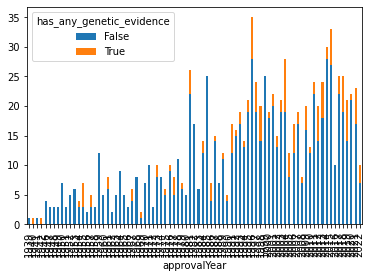

In [32]:

df_drugs2.groupby(["approvalYear", "has_any_genetic_evidence"]).size().unstack().plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='approvalYear'>

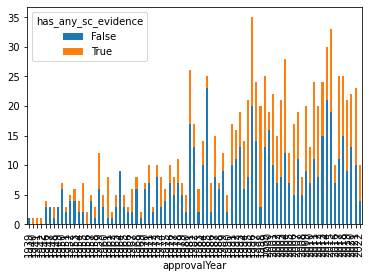

In [33]:
df_drugs2.groupby(["approvalYear", "has_any_sc_evidence"]).size().unstack().plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='maxPhase'>

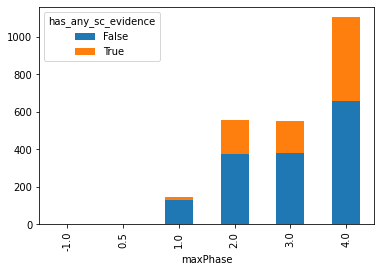

In [34]:
df_drugs.groupby(["maxPhase", "has_any_sc_evidence"]).size().unstack().plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='maxPhase'>

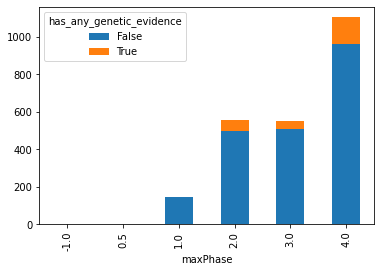

In [35]:
df_drugs.groupby(["maxPhase", "has_any_genetic_evidence"]).size().unstack().plot(kind='bar', stacked=True)

In [38]:
df_drugs.groupby('maxPhase').count()


,drugName,drugid,description,drugtype,withdrawn,blackBox,approvalYear,list_targets,list_diseases,has_any_sc_evidence,has_any_genetic_evidence,num_indications
maxPhase,,,,,,,,,,,,
-1.0,1,1,1,0,0,1,1,1,1,1,1,1
0.5,1,1,1,0,0,1,1,1,1,1,1,1
1.0,148,148,148,0,0,148,148,148,148,148,148,148
2.0,555,555,555,0,0,555,555,555,555,555,555,555
3.0,549,549,549,0,0,549,549,549,549,549,549,549
4.0,1104,1104,1104,0,0,1104,1104,1104,1104,1104,1104,1104


In [39]:
df_drugs.shape

(2358, 13)

In [40]:
# now extract MOA info

myPath = 'OT_json_2/mechanismOfAction'

col_names = ['actionType', 
             'mechanismOfAction',
             'chemblIds',
             'targetName',
             'targetType',
             'targets'
            ]

allFiles = os.listdir(myPath)
first = True
for module in allFiles:
    # get one file in directory
    if 'part-' in module: #if the word module is in the filename
        a = os.path.join(myPath, module)  
        
        targetsList = []
        #print("Started Reading JSON file which contains multiple JSON document")
        with open(a) as f:
            for jsonObj in f:
                targetsListDict = json.loads(jsonObj)
                targetsList.append(targetsListDict)
        
        i = 0
        nrow = len(targetsList)
        file_data = []
        while i < nrow:
            
            new_row = targetsList[i]
            #print(new_row)
            new_row = [targetsList[i]['actionType'],
                       targetsList[i]['mechanismOfAction'],
                       targetsList[i]['chemblIds'],
                       targetsList[i]['targetName'],
                       targetsList[i]['targetType'],
                       targetsList[i]['targets']
                     ]
            
           
                

            file_data.append(new_row)
            
            i = i+1
            #print(new_row)
        
        if first:
            all_data = file_data
            first = False
            
        
        else:
            all_data = all_data+file_data
            
df_moa = pd.DataFrame(all_data, columns = col_names) 

In [41]:
df_moa.head()

,actionType,mechanismOfAction,chemblIds,targetName,targetType,targets
0,POSITIVE ALLOSTERIC MODULATOR,GABA-A receptor; anion channel positive allost...,"[CHEMBL3989724, CHEMBL968]",GABA-A receptor; anion channel,protein complex group,"[ENSG00000022355, ENSG00000145864, ENSG0000011..."
1,INHIBITOR,Envelope phospholipase F13 (p37) inhibitor,[CHEMBL1257073],Envelope phospholipase F13 (p37),single protein,[]
2,INHIBITOR,Penicillin-binding protein inhibitor,"[CHEMBL1201041, CHEMBL1537]",Penicillin-binding protein,protein family,[]
3,INHIBITOR,Envelope glycoprotein inhibitor,[CHEMBL4298184],Envelope glycoprotein,single protein,[]
4,AGONIST,Peroxisome proliferator-activated receptor del...,[CHEMBL38943],Peroxisome proliferator-activated receptor delta,single protein,[ENSG00000112033]


In [42]:
df_drugs.head(2)

,drugName,drugid,description,drugtype,maxPhase,withdrawn,blackBox,approvalYear,list_targets,list_diseases,has_any_sc_evidence,has_any_genetic_evidence,num_indications
0,DESLORATADINE,CHEMBL1172,Small molecule drug with a maximum clinical tr...,None,4.0,None,False,2001,[ENSG00000196639],"[EFO_0007214, EFO_0005531, EFO_0005854, MONDO_...",True,False,14
1,CETRORELIX,CHEMBL1200490,Protein drug with a maximum clinical trial pha...,None,4.0,None,False,2000,[ENSG00000109163],"[EFO_0000545, MONDO_0011972, EFO_0000685, EFO_...",False,False,7


In [43]:
def get_action_type(drug_name, moa_df):
    moa_df['has_drug'] = moa_df.apply(lambda x: drug_name in x['chemblIds'], axis=1)
    num_match = moa_df['has_drug'].values.sum()
    
    moa_df2 = moa_df.loc[moa_df['has_drug']==True].copy()
    action_type = moa_df2['actionType'].copy().unique()
    
    return action_type

def get_drug_mechanism(drug_name, moa_df):
    
    moa_df['has_drug'] = moa_df.apply(lambda x: drug_name in x['chemblIds'], axis=1)
    num_match = moa_df['has_drug'].values.sum()
    
    moa_df2 = moa_df.loc[moa_df['has_drug']==True].copy()
    
    moa_type = moa_df2['mechanismOfAction'].copy().unique()
    
    #target_type = moa_df2['targetType'].copy().unique()
    #action_type = moa_df2['actionType'].copy().unique()
    
    return moa_type

def get_target_type(drug_name, moa_df):
    
    moa_df['has_drug'] = moa_df.apply(lambda x: drug_name in x['chemblIds'], axis=1)
    num_match = moa_df['has_drug'].values.sum()
    
    moa_df2 = moa_df.loc[moa_df['has_drug']==True].copy()
    
    #moa_type = moa_df2['mechanismOfAction'].copy().unique()
    
    target_type = moa_df2['targetType'].copy().unique()
    #action_type = moa_df2['actionType'].copy().unique()
    
    return target_type
    

In [44]:
A= get_drug_mechanism('CHEMBL3989724', df_moa)
print(A[0])

GABA-A receptor; anion channel positive allosteric modulator


In [45]:
drugs_list = df_drugs['drugid'].copy()
drugs_list

0          CHEMBL1172
1       CHEMBL1200490
2           CHEMBL129
3       CHEMBL2017974
4       CHEMBL4298191
            ...      
2353    CHEMBL1908391
2354    CHEMBL3544968
2355    CHEMBL3991241
2356      CHEMBL44657
2357    CHEMBL4650409
Name: drugid, Length: 2358, dtype: object

In [46]:
for i in drugs_list:
    #print(i)
    A= get_drug_mechanism(i, df_moa)
    ##num_match = A['has_drug'].values.sum()
    #print(A)
    B = get_action_type(i, df_moa)
    #print(B)
    C= get_target_type(i, df_moa)
    #print(C)

In [ ]:
# go through df_drugs to look up mechanism, action type and target_type
df_drugs['mechanism']='None'
df_drugs['action_type']='None'
df_drugs['target_type']='None'
df_drugs.head(4)

max_index = 2358
cur_index = 0

def list_to_string(m):
    mystring=""
    for elem in m:
        mystring=mystring+str(elem)+" "
    
    return mystring

while cur_index < max_index:
    this_drug = df_drugs.loc[cur_index, 'drugid']
    #print(this_drug)

    A = get_drug_mechanism(this_drug, df_moa)
    #print(A)
    B = get_action_type(this_drug, df_moa)
    #print(B)
    C = get_target_type(this_drug, df_moa)
    #print(C)
    
    df_drugs.at[cur_index, 'mechanism'] = list_to_string(A)
    df_drugs.at[cur_index, 'action_type'] = list_to_string(B)
    df_drugs.at[cur_index, 'target_type'] = list_to_string(C)
    
    cur_index = cur_index+1
    

df_drugs.head()

In [ ]:
df_drugs.shape

In [ ]:
df_drugs.to_csv("drugs_indications_sc_genetic_evidence_MOA_03062024.csv", sep='\t')